## Gaussian calculator  
*Version 2023 gja*

The Gaussian distribution is given by

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} 
\exp{ \left[ - \frac{1}{2} \left( 
\frac{x-\mu}{\sigma}
\right)^2 \right]}$$

This is a probability density function $f(x)$, so that $f(x)dx$ is the probability of $x$ being in the range $x$ to $x+dx$, for mean $\mu$ and dispersion $\sigma$. Below we provide calculators for (i) the probability density at $x$ for a given $\mu, \sigma$; (ii) the integral probability above $x$, and (iii) the integral probability between $x_1$ and $x_2$. 

If you want to explore graphically how the integral behaves, try the [Gaussian Areas Notebook](Gaussian-areas.ipynb) 

As usual, do Cell/Run All first, then you can edit parameters for specific cells. First, a standard set-up.

In [1]:
from math import *  # basic maths routines
import numpy as np
from scipy import stats

#### (1) Probability density for a given $x,\mu,\sigma$

In the code cell below, edit in the values of $x,\mu,\sigma$ you want and then run the cell. Note that we have rounded down to three decimal places, but you can change that if you wish by uncommenting the extra line. Remember that this probability density carries the units of $x$, i.e. it is the probability per unit $x$.

In [2]:
####### Gaussian calculator
mu=6.2
sig=2.3
x=4.9
######################
f=round(stats.norm.pdf(x,mu,sig),3)
# "pdf" stands for "probability density function"
# note difference with discrete prob.distbns where we used
# "pmf" for probability mass function.
print('x=',x,' mu=',mu,' sig=',sig,'  ==> f=',f)
###########

x= 4.9  mu= 6.2  sig= 2.3   ==> f= 0.148


#### (2) Probability above $x$ for given $\mu, \sigma$

Below we calculate both the "one-tailed" and "two-tailed" probabilities, i.e. 

$$P_1=(P>x) {\qquad\rm and \qquad} P_2=2P_1$$.

In [4]:
### Gaussian integral above/below x
mu=0.0
sig=1.92
x=5.0
################
#note standard cdf is below x; we want prob above x
fgx=stats.norm.cdf(x,mu,sig) # integral at x and below
P1=round((1.-fgx),5)
P2=2.*P1

print('x=',x, ' mu=',mu,'  sig=',sig, '==>',
     ' P1=',P1,' P2=',P2)

x= 5.0  mu= 0.0   sig= 1.92 ==>  P1= 0.0046  P2= 0.0092


#### (3) Probability between $x_1$ and $x_2$

For most problems we want the symmetrical probabilities. But sometimes we want the area between two arbitrary values of $x_1$ and $x_2$.


In [6]:
### Gaussian integral between two x-values
mu=0.0
sig=2.3
x1=4.6
x2=-4.6
################
fgx1=stats.norm.cdf(x1,mu,sig) # integral at x1 and below
fgx2=stats.norm.cdf(x2,mu,sig) # integral at x2 and below

between=round((fgx1-fgx2),3)
print('x1=',x1,' x2=',x2, ' mu=',mu,'sig=',sig, '==>',
     ' area between=',between)

x1= 4.6  x2= -4.6  mu= 0.0 sig= 2.3 ==>  area between= 0.954


#### (4) Value of centiles

We  may want to know the value of $z$ below which X% of measurements will lie.  We need the inverse of the CDF


In [19]:
X=0.84
sig=1
mu=0
print("mu=", mu, "Sigma=", sig,";  ", X*100,"% of the distribution lies below x=", stats.norm.ppf(X,mu,sig))


mu= 0 Sigma= 1 ;   84.0 % of the distribution lies below x= 0.994457883209753


**(5) And plot the Gaussian**

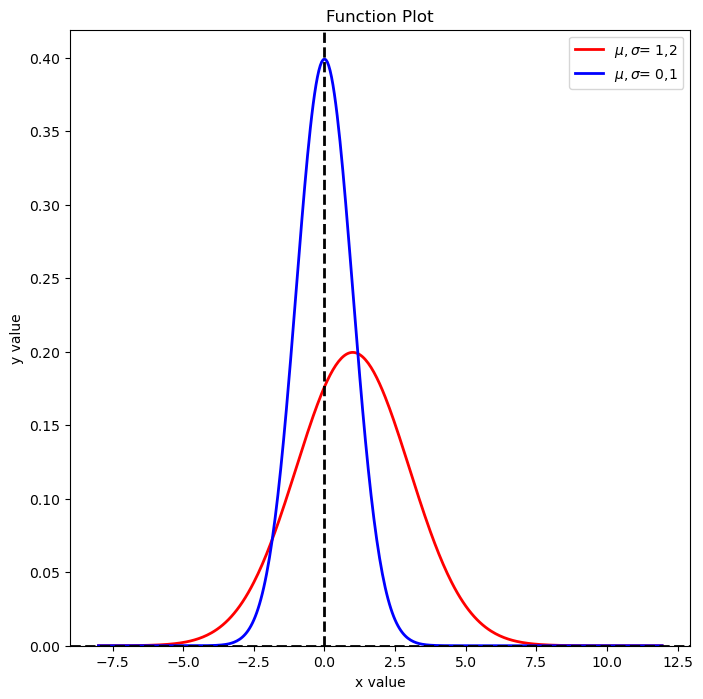

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xmin = -8.0
xmax = 12.0
mu1 = 1
sigma1 = 2
mu2 = 0
sigma2 = 1

x = np.arange(xmin, xmax, 0.05)
pdf = np.exp(-0.5 * ((x - mu1) / sigma1)**2) / np.sqrt(2.0 * np.pi) / sigma1
pdf2 = np.exp(-0.5 * ((x - mu2) / sigma2)**2) / np.sqrt(2.0 * np.pi) / sigma2

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the functions
ax.plot(x, pdf, linewidth=2, color='red', label='$\mu,\sigma$= 1,2')
ax.plot(x, pdf2, linewidth=2, color='blue', label='$\mu,\sigma$= 0,1')

# Draw horizontal dashed line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=2)

# Draw vertical dashed line at x=0
ax.axvline(0, ymin=np.min([pdf, pdf2]), ymax=1, color='black', linestyle='--', linewidth=2)

# Set labels and title
ax.set_xlabel('x value')
ax.set_ylabel('y value')
ax.set_title('Function Plot')

# Show legend
ax.legend()
# Set y-axis limit to 00.1
ax.set_ylim(0)

# Show the Matplotlib plot
plt.show()
